In [1]:
# %pip install torchvision

   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 1.6/1.6 MB 21.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random
import torch.optim as optim

In [4]:
USE_CUDA=torch.cuda.is_available()
print(USE_CUDA)
device = torch.device('cuda' if USE_CUDA else 'cpu')
print("다음 기기 사용: ", device)

False
다음 기기 사용:  cpu


In [6]:
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed(777)

In [7]:
epochs = 30
batch_size = 100

In [8]:
mnist_train = dsets.MNIST(root='MNIST_data/', train=True, transform=transforms.ToTensor(),download=True)
mnist_test = dsets.MNIST(root='MNIST_data/', train=False, transform=transforms.ToTensor(),download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:03<00:00, 3.11MB/s]


Extracting MNIST_data/MNIST\raw\train-images-idx3-ubyte.gz to MNIST_data/MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 150kB/s]


Extracting MNIST_data/MNIST\raw\train-labels-idx1-ubyte.gz to MNIST_data/MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:02<00:00, 787kB/s] 


Extracting MNIST_data/MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST_data/MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<?, ?B/s]

Extracting MNIST_data/MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST\raw



In [10]:
print(mnist_train)
print(mnist_test)

Dataset MNIST
    Number of datapoints: 60000
    Root location: MNIST_data/
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: MNIST_data/
    Split: Test
    StandardTransform
Transform: ToTensor()


In [11]:
data_loader = DataLoader(dataset=mnist_train, 
                         batch_size=batch_size, 
                         shuffle=True,
                         drop_last=True)        # 마지막 나머지를 버릴지 여부를 나타냄

In [12]:
for X, Y in data_loader:
    print(X.size(), Y.size())

torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([1

In [13]:
print(len(data_loader))

600


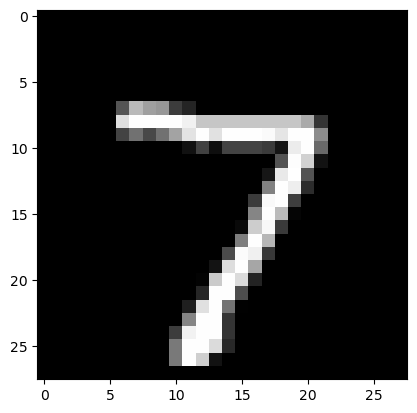

In [29]:
import matplotlib.pyplot as plt

plt.imshow(mnist_test.data[0].view(28, 28), cmap='gray')
plt.show()

In [30]:
print(mnist_test.targets[0])

tensor(7)


In [21]:
model = nn.Linear(784, 10, bias=True).to(device)
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [24]:
print(list(model.parameters()))

[Parameter containing:
tensor([[ 2.7237e-02,  2.7221e-02,  1.6018e-02,  ...,  2.0005e-02,
         -2.4505e-02,  1.1644e-02],
        [-3.8575e-03,  2.9399e-02,  7.4099e-03,  ..., -2.9822e-02,
          7.4010e-05,  2.6787e-02],
        [ 3.0080e-02, -2.1328e-02,  6.5948e-03,  ..., -1.5580e-02,
          3.3823e-02,  1.7100e-02],
        ...,
        [ 2.2515e-03,  1.1732e-02,  2.0664e-02,  ..., -1.2429e-02,
         -1.0554e-02, -8.9825e-03],
        [-1.2693e-02, -8.0397e-03,  2.9975e-02,  ...,  7.1139e-03,
          2.5636e-02,  3.3242e-02],
        [-2.7865e-02,  5.3291e-03,  1.4840e-03,  ..., -2.2437e-02,
          1.7010e-02, -2.8653e-02]], requires_grad=True), Parameter containing:
tensor([-0.0111,  0.0345,  0.0230,  0.0343,  0.0262, -0.0135,  0.0185,  0.0145,
         0.0128, -0.0055], requires_grad=True)]


In [25]:
for epoch in range(epochs):
    avg_cost = 0
    total_batch = len(data_loader)

    for X,Y in data_loader:
        X = X.view(-1, 28*28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        y_hat = model(X)
        cost = criterion(y_hat, Y)

        cost.backward()
        optimizer.step()
        avg_cost += cost/total_batch
    
    print(f"epoch {epoch} cost: {cost}, {avg_cost.item()}")
print("Learninglate finished")

epoch 0 cost: 0.36875611543655396, 0.5355079174041748
epoch 1 cost: 0.31162184476852417, 0.3595495820045471
epoch 2 cost: 0.49023982882499695, 0.33130598068237305
epoch 3 cost: 0.3181893825531006, 0.31678104400634766
epoch 4 cost: 0.4651868939399719, 0.30744117498397827
epoch 5 cost: 0.2740781605243683, 0.300284743309021
epoch 6 cost: 0.248897984623909, 0.2952483296394348
epoch 7 cost: 0.2904626727104187, 0.29064446687698364
epoch 8 cost: 0.2654235064983368, 0.2875213325023651
epoch 9 cost: 0.385152667760849, 0.2845115661621094
epoch 10 cost: 0.3004774749279022, 0.2817974090576172
epoch 11 cost: 0.21146918833255768, 0.27963942289352417
epoch 12 cost: 0.24894055724143982, 0.2776735723018646
epoch 13 cost: 0.41419756412506104, 0.2760351300239563
epoch 14 cost: 0.24702489376068115, 0.27434876561164856
epoch 15 cost: 0.40337273478507996, 0.2729761302471161
epoch 16 cost: 0.32675617933273315, 0.2718455493450165
epoch 17 cost: 0.19235506653785706, 0.27043086290359497
epoch 18 cost: 0.4115824

In [36]:
with torch.no_grad():     # gradiient 연산을 수행하지 않도록 함
    x_test = mnist_test.data.view(-1, 28*28).float().to(device)
    # print(x_test.size())
    y_test = mnist_test.targets.to(device)
    # print(y_test.size())

    prediction = model(x_test)
    # print(torch.argmax(prediction[0]))
    correct_pred = y_test == torch.argmax(prediction,1)         # dim = 1
    # print(correct_pred[0:10])
    accuracy = correct_pred.float().mean()
    print(f"accuray: {accuracy}")

accuray: 0.8720999956130981
